# Classificação Binária

In [26]:
# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [27]:
train_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
train_y = [1, 1, 1, 0, 0, 0]

In [49]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [29]:
model.fit(dados, classes)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [30]:
animal_misterioso = [1,1,1]

In [31]:
model.predict([animal_misterioso])

array([0])

In [32]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

test_x = [misterio1, misterio2, misterio3]

In [33]:
predicoes = model.predict(teste)

In [34]:
test_y = [0, 1, 1]

In [35]:
from sklearn.metrics import accuracy_score

In [39]:
taxa_de_acerto = accuracy_score(test_y, predicoes)
taxa_de_acerto

0.6666666666666666

# Projeto 2 - Acessos de um site vs. compra

In [1]:
import pandas as pd

In [26]:
url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

In [27]:
df = pd.read_csv(url)

In [28]:
df.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [29]:
mapa_colunas = {
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contato',
    'bought': 'comprou'
}

In [30]:
df.rename(columns=mapa_colunas, inplace True)

SyntaxError: invalid syntax (<ipython-input-30-a704bc4c7aba>, line 1)

In [ ]:
x = df[['principal', 'como_funciona', 'contato']]

In [ ]:
y = df[['comprou']]

In [31]:
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [32]:
y.head()

,comprou
0,0
1,0
2,0
3,0
4,0


In [33]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12, stratify=y)

**Random State** é utilizado para garantir que o algoritmo de separação não seja aleatório, mas siga uma ordem de acordo com o seed dado.

**Sratify** garante uma proporção entre os dados de teste e treino de acordo com uma variável dada

In [102]:
print(f'Shape de X de Treino {x_train.shape}')
print(f'Shape de X de Teste {x_test.shape}')
print(f'Shape de Y de Treino {y_train.shape}')
print(f'Shape de Y de Teste {y_test.shape}')

Shape de X de Treino (74, 3)
Shape de X de Teste (25, 3)
Shape de Y de Treino (74, 1)
Shape de Y de Teste (25, 1)


In [103]:
from sklearn.svm import LinearSVC

In [104]:
model = LinearSVC()

In [105]:
model.fit(x_train, y_train)

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [106]:
y_pred = model.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test, y_pred)

0.92

In [109]:
y_test['comprou'].value_counts()

0    17
1     8
Name: comprou, dtype: int64

In [110]:
y_train['comprou'].value_counts()

0    49
1    25
Name: comprou, dtype: int64

# Projeto 3 - Preco de um projeto vs finalização

In [1]:
import pandas as pd

In [2]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
mapa_unfinished = {
    0: 1,
    1: 0
}

In [5]:
df['unfinished'].map(mapa_unfinished)

0       0
1       0
2       0
3       0
4       0
       ..
2152    1
2153    0
2154    1
2155    1
2156    0
Name: unfinished, Length: 2157, dtype: int64

In [6]:
mapa_colunas = {
    'unfinished': 'finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

In [7]:
df.rename(columns = mapa_colunas, inplace=True)

In [8]:
df.head()

,finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [9]:
df.describe()

,finalizado,horas_esperadas,preco
count,2157.000000,2157.000000,2157.000000
mean,0.474270,50.515531,3140.696801
std,0.499453,28.589513,5079.220196
min,0.000000,1.000000,100.000000
25%,0.000000,26.000000,247.000000
50%,0.000000,51.000000,685.000000
75%,1.000000,75.000000,3668.000000
max,1.000000,100.000000,30223.000000


In [10]:
import seaborn as sns

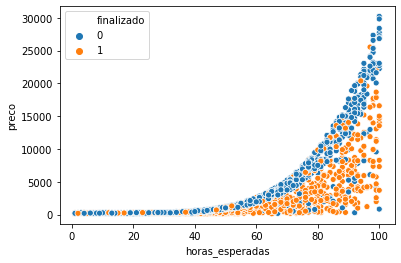

In [11]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df)

In [59]:
x = df[['horas_esperadas', 'preco']]
y = df[['finalizado']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2, stratify=y)

from sklearn.svm import LinearSVC
model = LinearSVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia é de {acc}')

A Acurácia é de 0.5439814814814815


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Curva de decisão

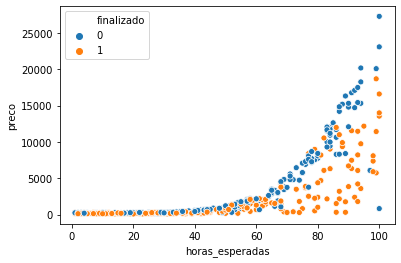

In [24]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=y_test['finalizado'], data=x_test)

In [22]:
y_test.shape

(432, 1)

In [23]:
x_test.shape

(432, 2)

In [52]:
x_min = x_test['horas_esperadas'].min()
x_max = x_test['horas_esperadas'].max()
y_min = x_test['preco'].min()
y_max = x_test['preco'].max()

In [53]:
pixels = 100

In [54]:
import numpy as np

In [55]:
x_axis = np.arange(x_min, x_max, ((x_max - x_min) / pixels))
y_axis = np.arange(y_min, y_max, ((y_max - y_min) / pixels))

In [56]:
xx, yy = np.meshgrid(x_axis, y_axis)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [57]:
z = model.predict(pontos)
z = z.reshape(xx.shape)

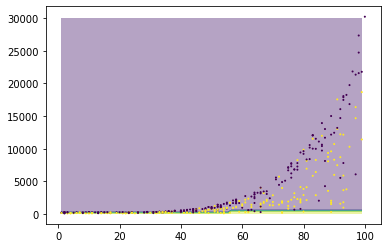

In [58]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.4)
plt.scatter(x_test['horas_esperadas'], x_test['preco'], c=y_test['finalizado'], s=1)

## Estimadores de Segundo Grau

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [74]:
x = df[['horas_esperadas', 'preco']]
y = df[['finalizado']]


raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia é de {acc}')

A Acurácia é de 0.6967592592592593


C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
import numpy as np
import matplotlib.pyplot as plt


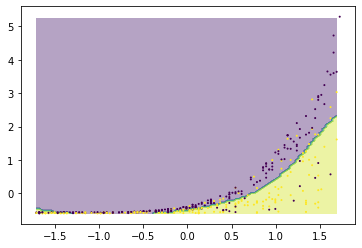

In [79]:
data_x = x_test[:, 0]
data_y = x_test[:, 1]


x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100

x_axis = np.arange(x_min, x_max, ((x_max - x_min) / pixels))
y_axis = np.arange(y_min, y_max, ((y_max - y_min) / pixels))

xx, yy = np.meshgrid(x_axis, y_axis)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)


plt.contourf(xx, yy, z, alpha=0.4)
plt.scatter(data_x, data_y, c=y_test['finalizado'], s=1)

# Projeto 4 - Vendas  de carro

In [80]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [81]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(url)

In [82]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [84]:
mapa_colunas = {
    'Unnamed: 0': 'id',
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

In [85]:
df.rename(columns=mapa_colunas, inplace=True)

In [86]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [88]:
mapa_vendido = {
    'yes': 1,
    'no': 0
}

In [92]:
df['vendido'] = df['vendido'].map(mapa_vendido)

In [93]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [94]:
df.describe()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,14183.391200,2004.14420,64842.373698,0.580000
std,2886.89568,5008.571422,4.68758,25250.592393,0.493583
min,0.00000,363.000000,1998.00000,-840.360000,0.000000
25%,2499.75000,10474.750000,2000.00000,44796.375000,0.000000
50%,4999.50000,13418.500000,2003.00000,65225.685000,1.000000
75%,7499.25000,17176.750000,2007.00000,85111.237500,1.000000
max,9999.00000,39572.000000,2017.00000,118929.720000,1.000000


In [97]:
from datetime import datetime 

In [99]:
df['idade_do_modelo'] = (datetime.today().year - df['ano_do_modelo'])

In [100]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [101]:
df['km_por_ano'] = (df['milhas_por_ano']*1.60934)

In [102]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [104]:
df.drop(columns=['id', 'milhas_por_ano', 'ano_do_modelo'], inplace=True)

In [105]:
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [107]:
x = df[['idade_do_modelo', 'preco', 'km_por_ano']]
y = df[['vendido']]


raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia é de {acc}')

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A Acurácia é de 0.771


## Dummy Classifier

In [109]:
from sklearn.dummy import DummyClassifier

In [111]:
dummy = DummyClassifier()

dummy.fit(x_train, y_train)

y_pred = dummy.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia do Dummy é de {acc}')

A Acurácia do Dummy é de 0.511
